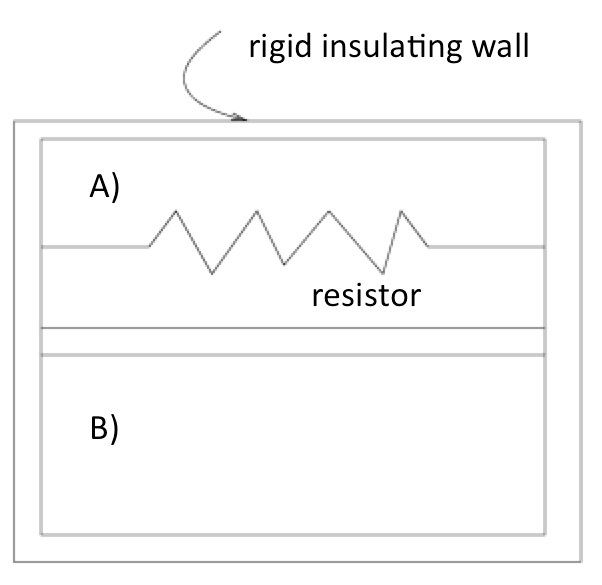

In [4]:
from IPython.display import Image
Image("images/ps1_fig.png",width="80%")

Given an initial pressure and temperature of 100 kPa and 273 K and a final pressure of 300 kPa.

Find:

1. The final temperature $T_B$ (K) in box B

2. The time integrated work $W_t = \int w dt$ (${J\,kg^{-1}}$) performed on the air in B by the membrane.

3. The final temperature $T_A$ (K) in box A

4. The time-integrated heating rate (${J\,kg^{-1}}$) of the gas in box A.



In [5]:
def theta_from_temp(temp,press):
    """
       Input: temp (K)
               press (kPa)
       Output: theta (K)
       Thompkins eq. 1.38
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    theta = temp*(p0/press)**(Rd/cpd)
    return theta

def temp_from_theta(theta,press):
    """Input: theta (K)
               press (kPa)
       Output: temp (K)
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    temp = theta/((p0/press)**(Rd/cpd))
    return temp
    
theta = theta_from_temp(273.,100.)
Tinitial = temp_from_theta(theta,100.)

print(theta,Tinitial)

273.0 273.0


## 1. The final temperature $T_B$ (K) in box B

In [6]:
Tfinal = temp_from_theta(theta,300.)
print("at press=300 kPa, the temperature in B is {:8.3f} K".format(Tfinal))

at press=300 kPa, the temperature in B is  373.724 K


## 2.  Work done by A on B:

$w = \int w_t dt = \int p_A d v_A$  where w is positive for work done on B and as in Thompkins, $v = 1/\rho = \text{Volume/mass}$

(we know A is expanding, so $dv_A > 0$)

The temperatures, pressures and densities are all initially the same in A and B, and since

$v = 1 / \rho$  that means that  $v_A =v_B$ initially.  The mass in each compartment is
$\rho_A \times 1\ m^{3}$ = $\rho_B$ $\times$ 1 $m^{3}$ (since the volumes in each compartment are 1 $m^3$).  The total volume ($V_T$) doesn't change, so $V_A + V_B = V_T = 2\ m^3$ and $dV_A = - dV_B$.  Since the mass in each compartment is also constant that means $dv_A = - dv_B$. 


Thompkins 1.21 (using my notation):
 
$q_t   = \frac{du}{dt} + w_t = \frac{du}{dt}  + 
p\frac{dv}{dt} = c_v \frac{dT}{dt} + p \frac{dv}{dt}$  = 0 for compartment B


So for compartment B:  $\int du = - \int w_t dt = - \int_{initial}^{final} c_v \frac{dT}{dt} dt = - c_v (Tfinal  - Tinitial)$

The work done by B is a negative number  because it is undergoing compression, so $d_v < 0$.  But since the pressure is always equal across the compartments  we know that work_done_by_B = - work_done_on_B


In [7]:
cv = 718  #J/kg/K
work_done_on_B = cv*(Tfinal - Tinitial)
print("work done on B by A= {:8.3f} J/kg".format(work_done_on_B))

work done on B= 72319.774 J/kg


## 3. Final temperature of A





We can get this from the equation of state (Thompkins 1.7) if we can figure out the density of A.  From the equation of state:

$pV/T = n R_* = constant=C$.  Using our intial values of $p=1 \times 10^5\ Pa$, V=$1\ m^3$, T=273 K, $C=10^5/273 = p_B V_B/T_B$.

In [9]:
C = 1.e5/273  #J/K
p_B=3.e5  #Pa
T_B = Tfinal
V_B = C*T_B/p_B
print("final volume of B = {:7.3f} m^3".format(V_B))
V_A = 2 - V_B  #total volume of 2 m^3 is conserved
print("final volume of A = {:7.3f} m^3".format(V_A))

final volume of B =   0.456 m^3
final volume of A =   1.544 m^3


In [10]:
p_A = 3.e5   #Pa
T_A = V_A*p_A/C
print("final Temperature of A= {:7.3f} K".format(T_A))

final Temperature of A= 1264.276 K


##  4. Total heating of A

Using the   we've got:

$\int q_t dt  = \int \frac{du}{dt} dt  + \int w_t dt = c_v (Tfinal - Tinitial)$ + work_done_on_B

In [14]:
heating_of_A = cv*(T_A - Tinitial) + work_done_on_B
print("heating of A = {:7.3f} J/kg".format(heating_of_A))

heating of A = 784056.000 J/kg


#  New problem

Consider two compartments, each with a volume of 1 $m^3$, separated by a rigid, perfectly insulating membrane.

Initially T_A = 300 K and p_A = $10^5$ Pa, and T_B= 100 K and p_B = 10^3 Pa.  Suppose the membrane breaks.  Find the final temperature and pressure in the 2 m^3 compartment.   Does the potential temperature theta change?   Why or why not?